In [37]:
import pandas as pd
import numpy as np
import NDCG as ndcg
import MHR as mhr
import sys
import types
ndcg.reload_package(mhr)
from sklearn.svm import SVR, LinearSVR
from sklearn.grid_search import GridSearchCV
from scipy.stats import spearmanr
from sklearn.metrics import make_scorer
from time import time
%matplotlib inline

loading MHR


In [14]:
reviews_features = pd.read_csv('data/eletronic_sample_counts.csv.gz')
df_agg = reviews_features[['word_count','asin']].groupby(['asin']).agg(['count','mean'])
df_agg['word_count'].sort_values('count',ascending=False).head(10)

,count,mean
asin,,
B00BGA9WK2,351,253.079772
B00A3YN0Z0,219,104.237443
B0074BW614,201,451.900498
B00CMQTVK0,165,334.696970
B0094NY3R0,147,232.972789
B0045FM6SU,140,374.121429
B00DVFLJDS,139,352.625899
B009LL9VDG,133,424.443609
B002C7481G,132,501.636364


In [138]:
data = pd.read_csv("data/parameters_estimation.csv")
data.head()

,Unnamed: 0,alpha,beta,ndcg_mean
0,0,0.900000,-0.120000,0.939195
1,1,0.900000,-0.120000,0.939195
2,2,0.900000,-0.120000,0.939195
3,3,1.184605,-0.120000,0.832707
4,4,0.900000,-0.082053,0.914038


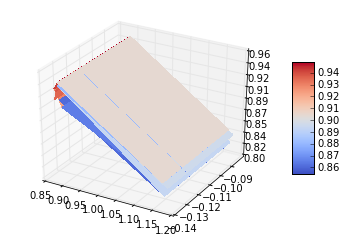

In [139]:
data = pd.read_csv("data/parameters_estimation.csv")

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.gca(projection='3d')

X = data['alpha'].values
Y = data['beta'].values
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
#Z = np.sin(data['ndcg_mean'].values)
Z = data['ndcg_mean'].values
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
#ax.set_zlim(-1.01, 1.01)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()



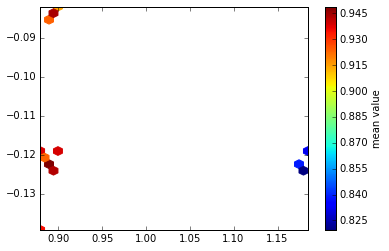

In [141]:
data = pd.read_csv("data/parameters_estimation.csv")

from matplotlib import pyplot as PLT
from matplotlib import cm as CM
from matplotlib import mlab as ML
import numpy as NP

x = data['alpha'].values
y = data['beta'].values

z = data['ndcg_mean'].values


gridsize=30
PLT.subplot(111)

# if 'bins=None', then color of each hexagon corresponds directly to its count
# 'C' is optional--it maps values to x-y coordinates; if 'C' is None (default) then 
# the result is a pure 2D histogram 

PLT.hexbin(x, y, C=z, gridsize=gridsize, cmap=CM.jet, bins=None)
PLT.axis([x.min(), x.max(), y.min(), y.max()])

cb = PLT.colorbar()
cb.set_label('mean value')
PLT.show()   